In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

file_path = '/content/drive/My Drive/Intro to ML/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

Mounted at /content/drive


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [3]:
inputVariables = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
x = housing[inputVariables].values
y = housing['price'].values
scaledXValues = StandardScaler().fit_transform(x)
scaledYValues = StandardScaler().fit_transform(y.reshape(-1,1)).flatten()

In [4]:
t_x = torch.tensor(scaledXValues)
t_y = torch.tensor(scaledYValues)

2a. Develop preprocessing and a training loop to train a linear regression model

In [5]:
n_samples = t_x.shape[0]
n_val = int (0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices [:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_x = t_x[train_indices]
train_t_y = t_y[train_indices]

val_t_x = t_x[val_indices]
val_t_y = t_y[val_indices]

In [6]:
def linearModel (t_x, w12, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b):
 return torch.matmul(t_x, params[:-1].double()) + params[-1].double()

In [7]:
def loss(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()


In [8]:
def linearTrainingLoop(n_epochs, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y):
  trainLosses = []
  validLosses = []

  for epoch in range (1, n_epochs + 1):
    train_t_p = linearModel(train_t_x, *params)
    train_loss = loss(train_t_p, train_t_y)

    val_t_p = linearModel(val_t_x, *params)
    val_loss = loss(val_t_p, val_t_y)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    trainLosses.append(train_loss)
    validLosses.append(val_loss)


    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {val_loss:.6f}\n')
  return params, trainLosses, validLosses

2b. SGD

Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss and validation accuracy for every 500 epochs per training.

In [10]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print('Learning rate of 0.1')
model1, trainLoss1, validLoss1  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
SGD_trainLoss1 = np.array([item.detach().item() for item in trainLoss1])
SGD_validLoss1 = np.array([item.detach().item() for item in validLoss1])

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.01)
print('Learning rate of 0.01')
model2, trainLoss2, validLoss2  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
SGD_trainLoss2 = np.array([item.detach().item() for item in trainLoss2])
SGD_validLoss2 = np.array([item.detach().item() for item in validLoss2])

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr=0.001)
print('Learning rate of 0.001')
model3, trainLoss3, validLoss3  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
SGD_trainLoss3 = np.array([item.detach().item() for item in trainLoss3])
SGD_validLoss3 = np.array([item.detach().item() for item in validLoss3])

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.0001)
print('Learning rate of 0.0001')
model4, trainLoss4, validLoss4  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
SGD_trainLoss4 = np.array([item.detach().item() for item in trainLoss4])
SGD_validLoss4 = np.array([item.detach().item() for item in validLoss4])



Learning rate of 0.1
Epochs: 500, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 1000, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 1500, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 2000, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 2500, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 3000, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 3500, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 4000, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 4500, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 5000, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Learning rate of 0.01
Epochs: 500, 	Training Loss: 0.341994, 	Validation Loss: 0.271159

Epochs: 1000, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 1500, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 2000, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs:

3b. ADAM

Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.

In [11]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.1)
print('Learning rate of 0.1')
model1, trainLoss1, validLoss1  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
adam_trainLoss1 = np.array([item.detach().item() for item in trainLoss1])
adam_validLoss1 = np.array([item.detach().item() for item in validLoss1])

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.01)
print('Learning rate of 0.01')
model2, trainLoss2, validLoss2  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
adam_trainLoss2 = np.array([item.detach().item() for item in trainLoss2])
adam_validLoss2 = np.array([item.detach().item() for item in validLoss2])

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr=0.001)
print('Learning rate of 0.001')
model3, trainLoss3, validLoss3  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
adam_trainLoss3 = np.array([item.detach().item() for item in trainLoss3])
adam_validLoss3 = np.array([item.detach().item() for item in validLoss3])

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.0001)
print('Learning rate of 0.0001')
model4, trainLoss4, validLoss4  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
adam_trainLoss4 = np.array([item.detach().item() for item in trainLoss4])
adam_validLoss4 = np.array([item.detach().item() for item in validLoss4])

Learning rate of 0.1
Epochs: 500, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 1000, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 1500, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 2000, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 2500, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 3000, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 3500, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 4000, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 4500, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 5000, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Learning rate of 0.01
Epochs: 500, 	Training Loss: 0.342022, 	Validation Loss: 0.270956

Epochs: 1000, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 1500, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs: 2000, 	Training Loss: 0.341994, 	Validation Loss: 0.271265

Epochs:

3c. Visual Comparison

Text(0.5, 1.0, 'Loss with Learning Rate of 0.0001')

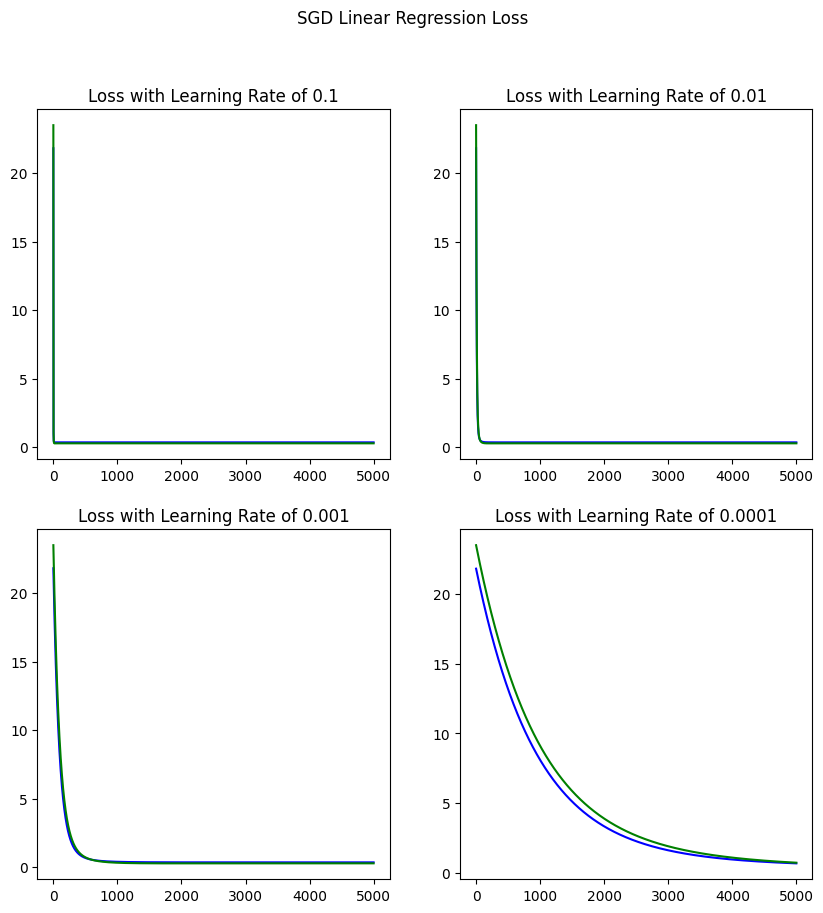

In [16]:
plt.figure(figsize=(10, 10))
plt. suptitle ("SGD Linear Regression Loss")

plt.subplot(2,2,1)
plt.plot(SGD_trainLoss1, color='blue')
plt.plot(SGD_validLoss1, color='green')
plt.title('Loss with Learning Rate of 0.1')

plt.subplot(2,2,2)
plt.plot(SGD_trainLoss2, color='blue')
plt.plot(SGD_validLoss2, color='green')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,3)
plt.plot(SGD_trainLoss3, color='blue')
plt.plot(SGD_validLoss3, color='green')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,4)
plt.plot(SGD_trainLoss4, color='blue')
plt.plot(SGD_validLoss4, color='green')
plt.title('Loss with Learning Rate of 0.0001')



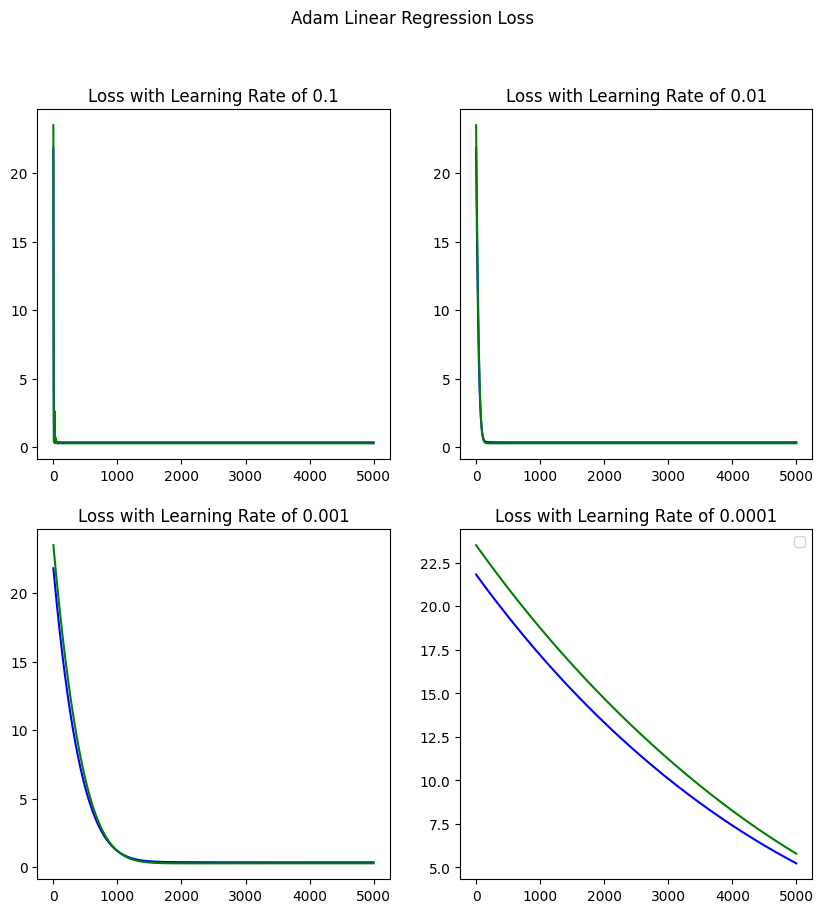

In [17]:
plt.figure(figsize=(10, 10))
plt. suptitle ("Adam Linear Regression Loss")

plt.subplot(2,2,1)
plt.plot(adam_trainLoss1, color='blue')
plt.plot(adam_validLoss1, color='green')
plt.title('Loss with Learning Rate of 0.1')

plt.subplot(2,2,2)
plt.plot(adam_trainLoss2, color='blue')
plt.plot(adam_validLoss2, color='green')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,3)
plt.plot(adam_trainLoss3, color='blue')
plt.plot(adam_validLoss3, color='green')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,4)
plt.plot(adam_trainLoss4, color='blue')
plt.plot(adam_validLoss4, color='green')
plt.title('Loss with Learning Rate of 0.0001')

plt.legend()
plt.show()